# Цель лабораторной работы
Изучить различные методы визуализации данных<cite data-cite="ue:lab1"></cite>.

# Задание
Требуется выполнить следующие действия<cite data-cite="ue:lab1"></cite>:

* Выбрать набор данных (датасет).
* Создать ноутбук, который содержит следующие разделы:
    1. Текстовое описание выбранного набора данных.
    2. Основные характеристики датасета.
    3. Визуальное исследование датасета.
    4. Информация о корреляции признаков.
* Сформировать отчет и разместить его в&nbsp;своем репозитории на&nbsp;GitHub.

# Ход выполнения работы

## Текстовое описание набора данных
В&nbsp;качестве набора данных используются метрологические данные с&nbsp;метеостанции HI-SEAS (Hawaii Space Exploration Analog and Simulation) за&nbsp;четыре месяца (с&nbsp;сентября по&nbsp;декабрь 2016&nbsp;года)<cite data-cite="kg:srp"></cite>. Данный набор данных доступен по&nbsp;следующему адресу: <https://www.kaggle.com/dronio/SolarEnergy>.

Этот набор данных состоит из&nbsp;одного файла `SolarPrediction.csv`, содержащего все данные датасета. Данный файл содержит следующие колонки:

* `UNIXTime` — временная метка измерения в&nbsp;формате UNIX;
* `Data` — дата измерения;
* `Time` — время измерения (в&nbsp;местной временной зоне);
* `Radiation` — солнечное излучение ($\text{Вт}/\text{м}^2$);
* `Temperature` — температура (°F);
* `Pressure` — атмосферное давление (дюймов ртутного столба);
* `Humidity` — относительная влажность (%);
* `WindDirection(Degrees)` — направление ветра (°);
* `Speed` — скорость ветра (миль/ч);
* `TimeSunRise` — время восхода (в&nbsp;местной временной зоне);
* `TimeSunSet` — время заката (в&nbsp;местной временной зоне).

## Основные характеристики набора данных

Подключим все необходимые библиотеки:

In [1]:
from datetime import datetime
import pandas as pd
import seaborn as sns

Настроим отображение графиков<cite data-cite="doc:ipython,doc:seaborn"></cite>:

In [2]:
# Enable inline plots
%matplotlib inline

# Set plot style
sns.set(style="ticks")

# Set plots formats to save high resolution PNG
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

Зададим ширину текстового представления данных, чтобы в&nbsp;дальнейшем текст в&nbsp;отчёте влезал на&nbsp;А4<cite data-cite="doc:pandas"></cite>:

In [3]:
pd.set_option("display.width", 70)

Загрузим непосредственно данные:

In [4]:
data = pd.read_csv("./SolarPrediction.csv")

Преобразуем временные колонки в соответствующий временной формат:

In [5]:
data["UNIXTime"] = (pd
                    .to_datetime(data["UNIXTime"], unit="s", utc=True)
                    .dt.tz_convert("Pacific/Honolulu"))

data["Data"] = data["UNIXTime"].dt.date
data["Time"] = data["UNIXTime"].dt.time

data["TimeSunRise"] = (pd
                       .to_datetime(data["TimeSunRise"],
                                    infer_datetime_format=True)
                       .dt.time)

data["TimeSunSet"] = (pd
                      .to_datetime(data["TimeSunSet"],
                                   infer_datetime_format=True)
                      .dt.time)

data = data.rename({"Data": "Date",
                    "WindDirection(Degrees)": "WindDirection"},
                   axis=1)

Проверим полученные типы:

In [6]:
data.dtypes

UNIXTime         datetime64[ns, Pacific/Honolulu]
Date                                       object
Time                                       object
Radiation                                 float64
Temperature                                 int64
Pressure                                  float64
Humidity                                    int64
WindDirection                             float64
Speed                                     float64
TimeSunRise                                object
TimeSunSet                                 object
dtype: object

Посмотрим на данные в&nbsp;данном наборе данных:

In [7]:
data.head()

,UNIXTime,Date,Time,Radiation,Temperature,Pressure,Humidity,WindDirection,Speed,TimeSunRise,TimeSunSet
0,2016-09-29 23:55:26-10:00,2016-09-29,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,2016-09-29 23:50:23-10:00,2016-09-29,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,2016-09-29 23:45:26-10:00,2016-09-29,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,2016-09-29 23:40:21-10:00,2016-09-29,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,2016-09-29 23:35:24-10:00,2016-09-29,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


Очевидно, что все эти временные характеристики в&nbsp;таком виде нам не&nbsp;особо интересны. Преобразуем все нечисловые столбцы в&nbsp;числовые. В&nbsp;целом колонка `UNIXTime` нам не&nbsp;интересна, дата скорее интереснее в&nbsp;виде дня в&nbsp;году. Время измерения может быть интересно в&nbsp;двух видах: просто секунды с&nbsp;полуночи, и время, нормализованное относительно рассвета и заката. Для&nbsp;преобразования времени в&nbsp;секунды используем следующий метод<cite data-cite="so:dttseconds"></cite>:

In [8]:
def time_to_second(t):
    return ((datetime.combine(datetime.min, t) - datetime.min)
            .total_seconds())

In [9]:
df = data.copy()

df["Day"] = df["UNIXTime"].dt.dayofyear

df["TimeInSeconds"] = df["Time"].map(time_to_second)

sunrise = df["TimeSunRise"].map(time_to_second)
sunset = df["TimeSunSet"].map(time_to_second)
df["DayPart"] = (df["TimeInSeconds"] - sunrise) / (sunset - sunrise)

df = df.drop(["UNIXTime", "Date", "Time",
              "TimeSunRise", "TimeSunSet"], axis=1)

df.head()

,Radiation,Temperature,Pressure,Humidity,WindDirection,Speed,Day,TimeInSeconds,DayPart
0,1.21,48,30.46,59,177.39,5.62,273,86126.0,1.475602
1,1.21,48,30.46,58,176.78,3.37,273,85823.0,1.468588
2,1.23,48,30.46,57,158.75,3.37,273,85526.0,1.461713
3,1.21,48,30.46,60,137.71,3.37,273,85221.0,1.454653
4,1.17,48,30.46,62,104.95,5.62,273,84924.0,1.447778


In [10]:
df.dtypes

Radiation        float64
Temperature        int64
Pressure         float64
Humidity           int64
WindDirection    float64
Speed            float64
Day                int64
TimeInSeconds    float64
DayPart          float64
dtype: object

С&nbsp;такими данными уже можно работать. Проверим размер набора данных:

In [11]:
df.shape

(32686, 9)

Проверим основные статистические характеристики набора данных:

In [12]:
df.describe()

,Radiation,Temperature,Pressure,Humidity,WindDirection,Speed,Day,TimeInSeconds,DayPart
count,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869,306.110965,43277.574068,0.482959
std,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474,34.781367,24900.749819,0.602432
min,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000,245.000000,1.000000,-0.634602
25%,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000,277.000000,21617.000000,-0.040139
50%,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000,306.000000,43230.000000,0.484332
75%,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000,334.000000,64849.000000,1.006038
max,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000,366.000000,86185.000000,1.566061


## Визуальное исследование датасета

Оценим распределение целевого признака — мощности солнечного излучения:

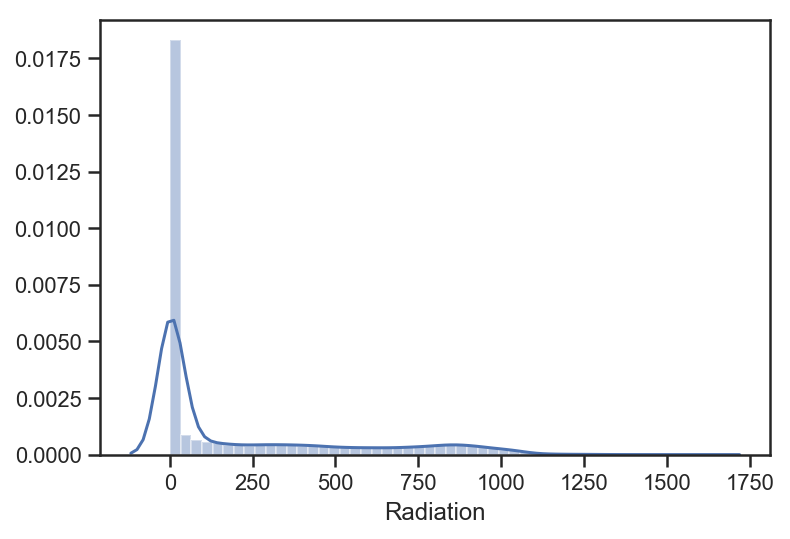

In [13]:
sns.distplot(df["Radiation"]);

Видно, что имеется большой перевес в&nbsp;пользу практически нулевого излучения. Оценим, наскольки мощность солнечного излучения зависит от&nbsp;наличия солнца на небе:

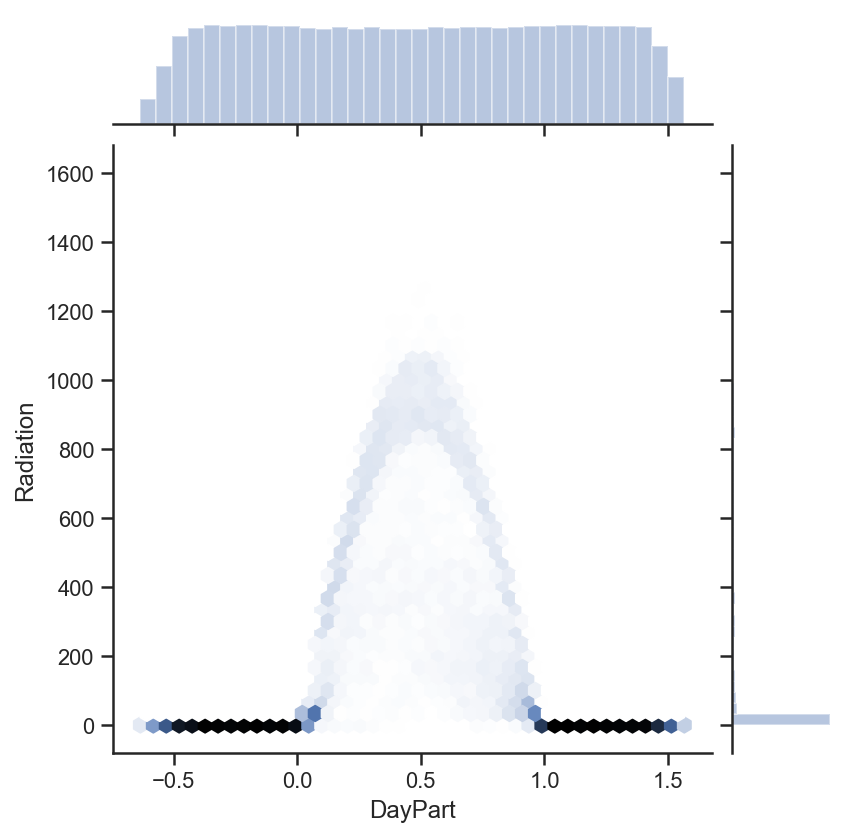

In [14]:
sns.jointplot(x="DayPart", y="Radiation", data=df, kind="hex");

Видно, что если солнца нет на&nbsp;небе, то мощность солнечного излучения стремится к&nbsp;нулю. Посмотрим на&nbsp;распределение мощности излучения в&nbsp;течение дня:

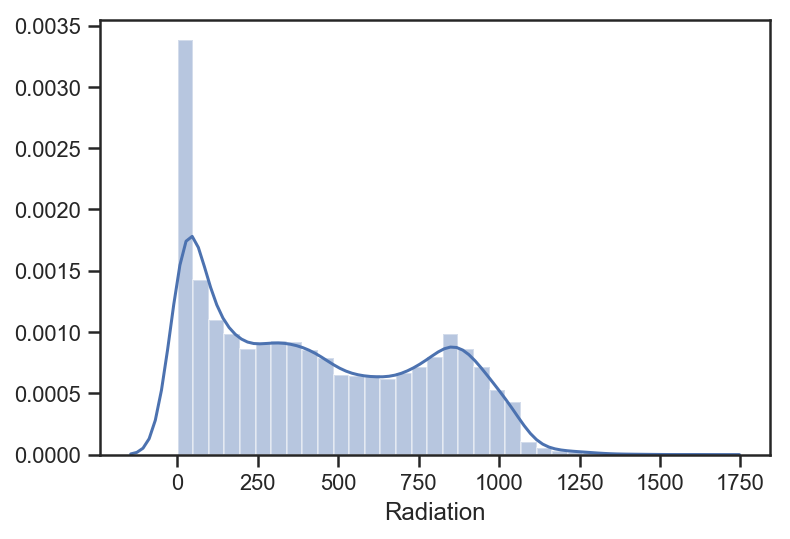

In [15]:
dfd = df[(df["DayPart"] >= 0) & (df["DayPart"] <= 1)]
sns.distplot(dfd["Radiation"]);

Теперь оценить влияние времени дня на мощность солнечного излучения будет заметно проще:

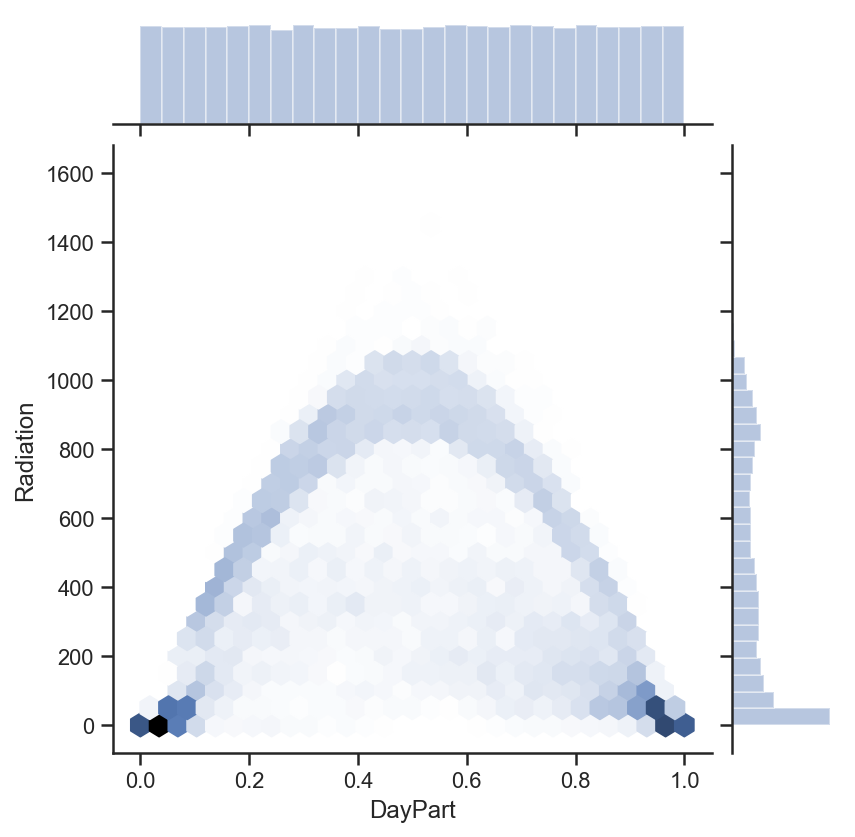

In [16]:
sns.jointplot(x="DayPart", y="Radiation", data=dfd, kind="hex");

Посмотрим также на&nbsp;зависимость мощности солнечного излучения от&nbsp;температуры:

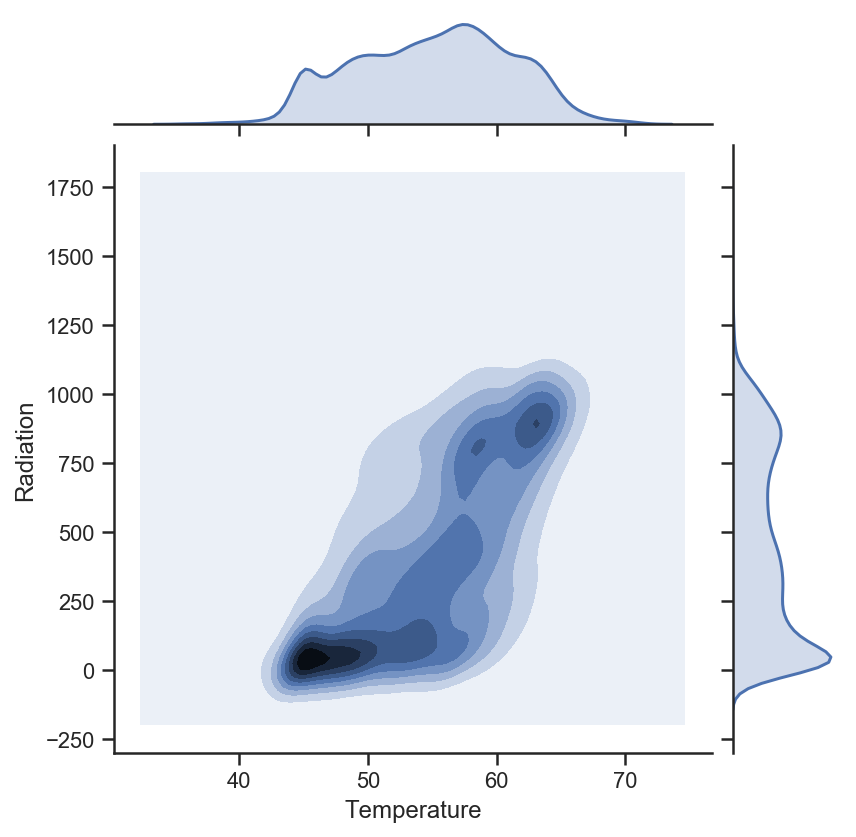

In [17]:
sns.jointplot(x="Temperature", y="Radiation", data=dfd, kind="kde");

Видно, что некоторая зависимость определённо есть, но не&nbsp;настолько большая, насколько хотелось бы. Возможно на&nbsp;большей выборке эта зависимость стала бы ещё менее заметной.

Построим парные диаграммы по&nbsp;всем показателям по&nbsp;исходному набору данных:

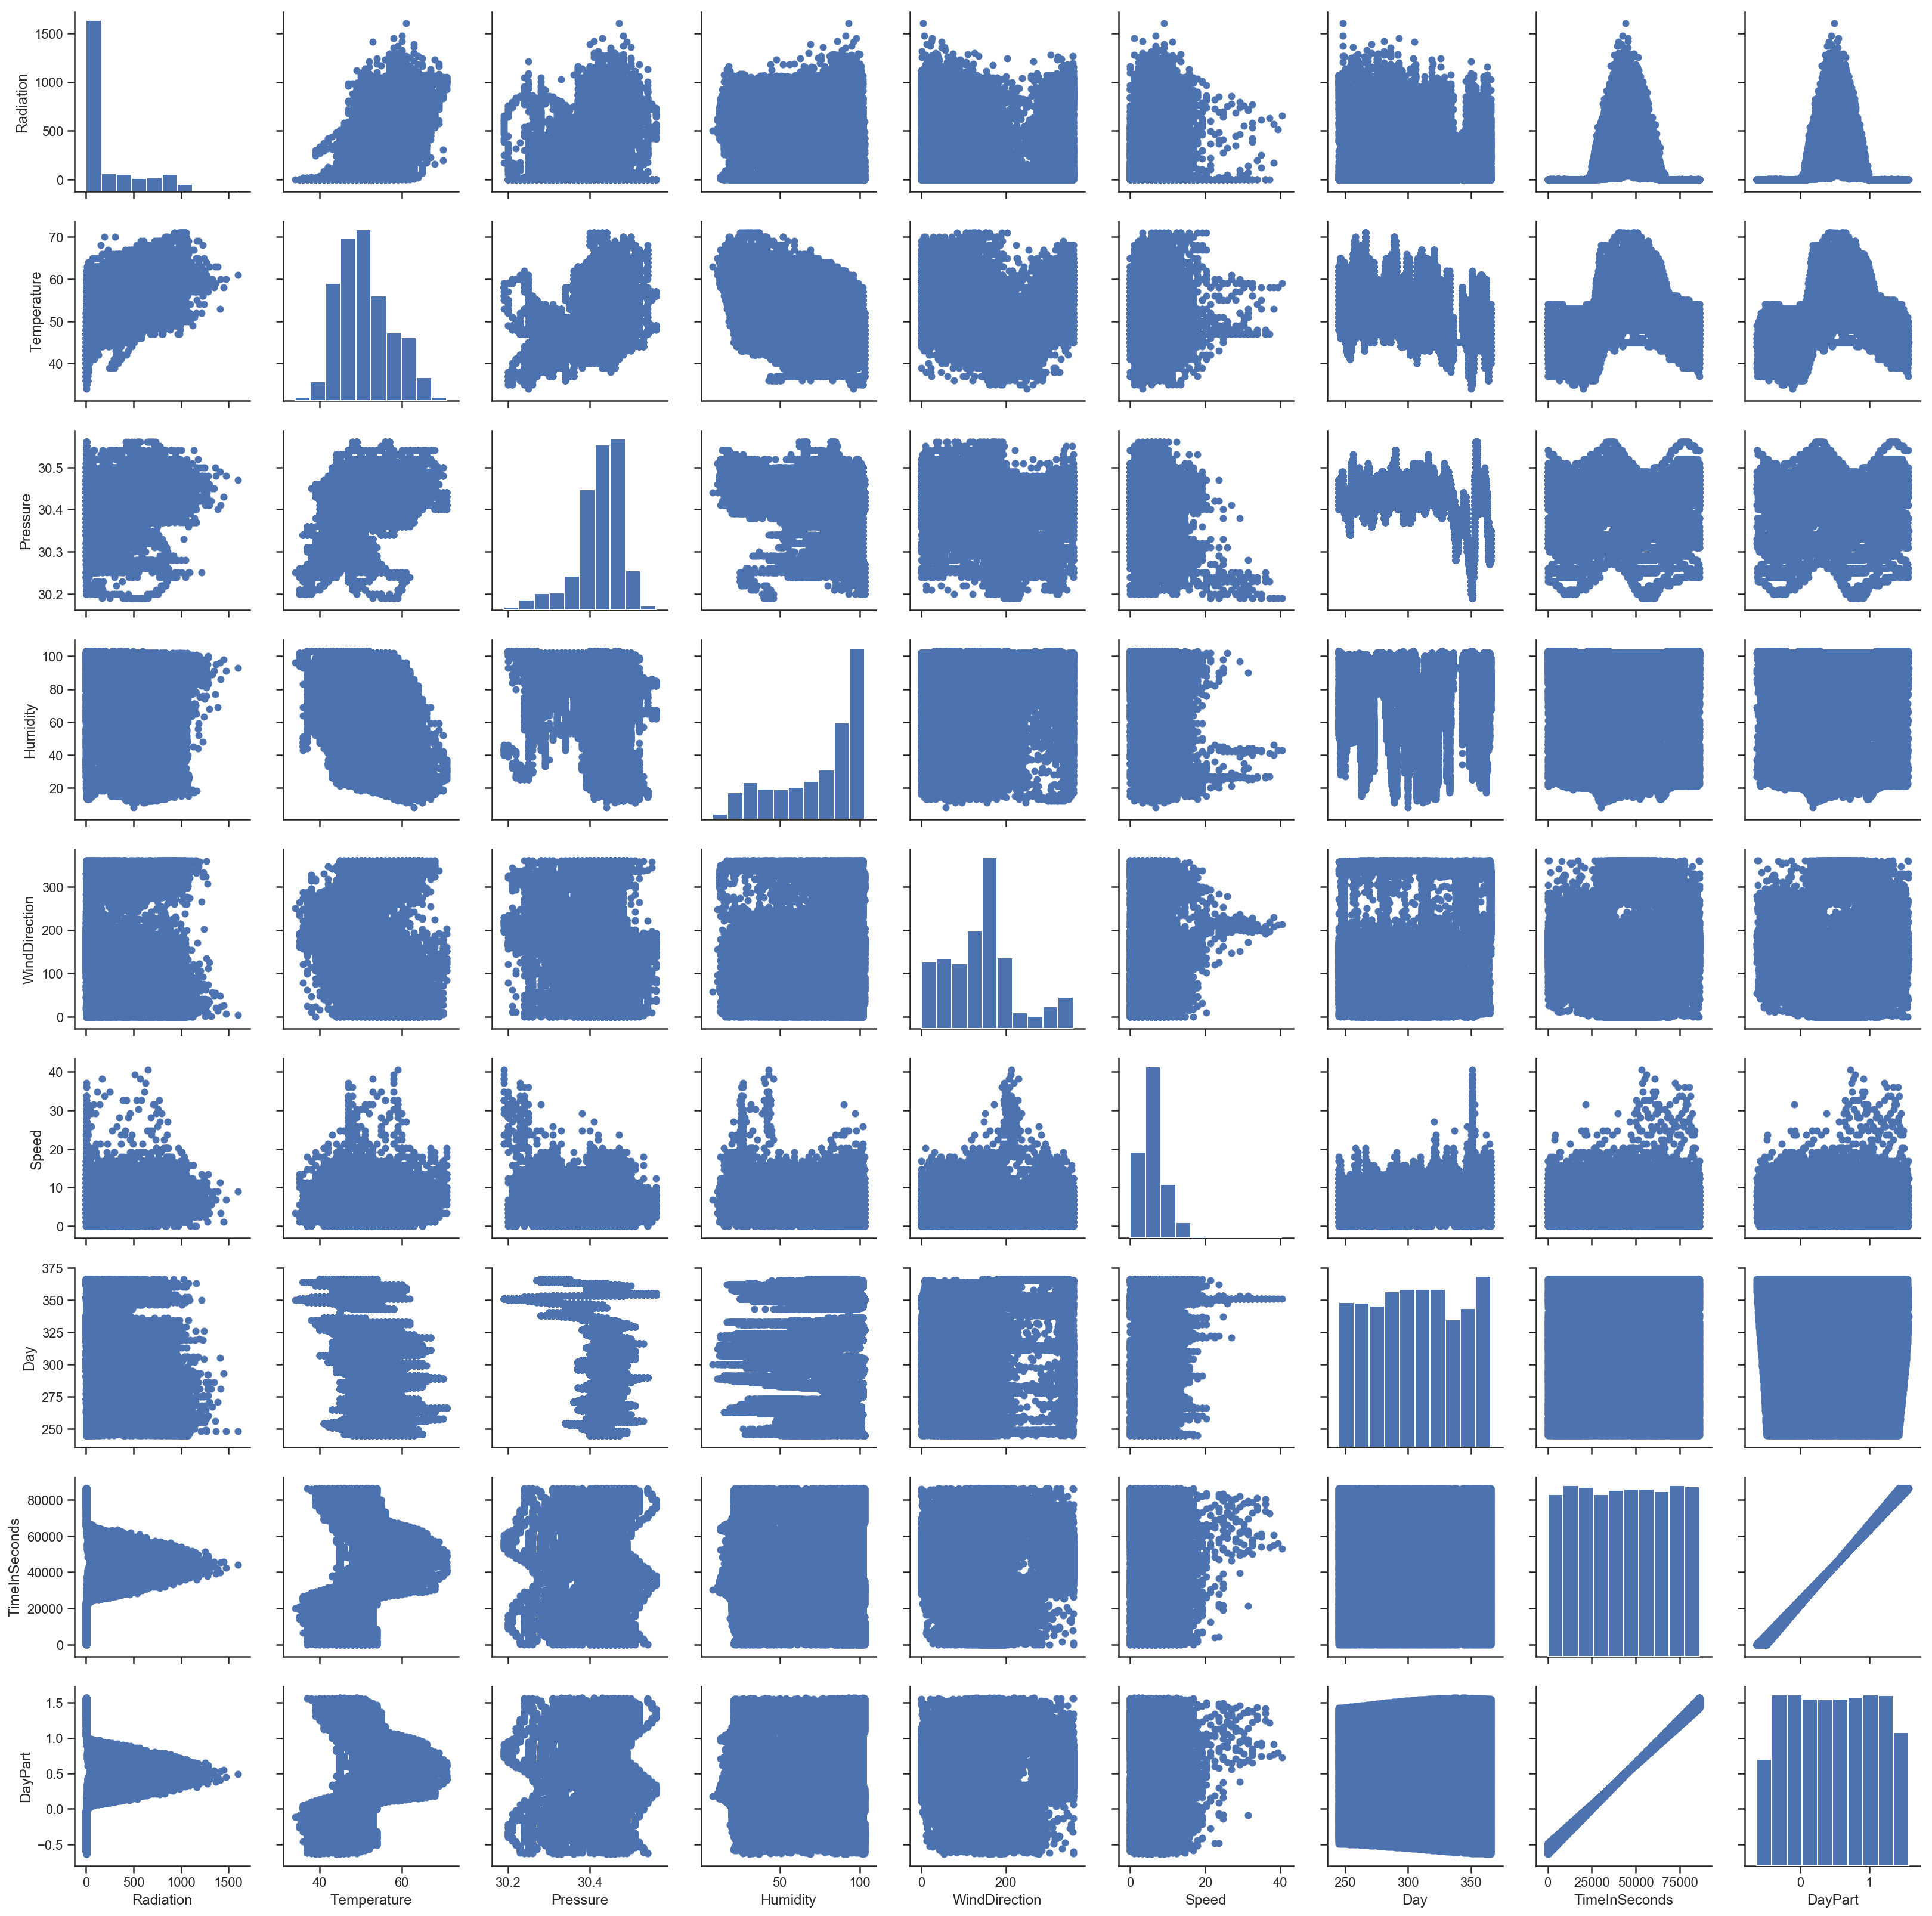

In [18]:
sns.pairplot(df, plot_kws=dict(linewidth=0));

Видно, что близкая к&nbsp;линейной зависимость есть только между временем с&nbsp;начала дня и приведение этого времени к&nbsp;промежутку наличия солнца на&nbsp;небе. Кроме того, видно выброс по&nbsp;скорости ветра, который происходил в один день и во&nbsp;время которого мощность солнечного излучения была близка к&nbsp;нулю. Имеет смысл учесть это при&nbsp;дальнейшем использовании этого набора данных и либо убрать этот выброс вообще, либо следить за&nbsp;тем, чтобы модели не&nbsp;переобучались на&nbsp;скорость ветра.

## Информация о корреляции признаков

Построим корреляционную матрицу по всему набору данных:

In [19]:
df.corr()

,Radiation,Temperature,Pressure,Humidity,WindDirection,Speed,Day,TimeInSeconds,DayPart
Radiation,1.000000,0.734955,0.119016,-0.226171,-0.230324,0.073627,-0.081320,0.004348,0.005980
Temperature,0.734955,1.000000,0.311173,-0.285055,-0.259421,-0.031458,-0.370794,0.197227,0.198520
Pressure,0.119016,0.311173,1.000000,-0.223973,-0.229010,-0.083639,-0.332762,0.091066,0.094403
Humidity,-0.226171,-0.285055,-0.223973,1.000000,-0.001833,-0.211624,-0.063760,0.077851,0.075513
WindDirection,-0.230324,-0.259421,-0.229010,-0.001833,1.000000,0.073092,0.153255,-0.077956,-0.078130
Speed,0.073627,-0.031458,-0.083639,-0.211624,0.073092,1.000000,0.174336,-0.057908,-0.056095
Day,-0.081320,-0.370794,-0.332762,-0.063760,0.153255,0.174336,1.000000,-0.007094,-0.010052
TimeInSeconds,0.004348,0.197227,0.091066,0.077851,-0.077956,-0.057908,-0.007094,1.000000,0.998980
DayPart,0.005980,0.198520,0.094403,0.075513,-0.078130,-0.056095,-0.010052,0.998980,1.000000


Визуализируем корреляционную матрицу с&nbsp;помощью тепловой карты:

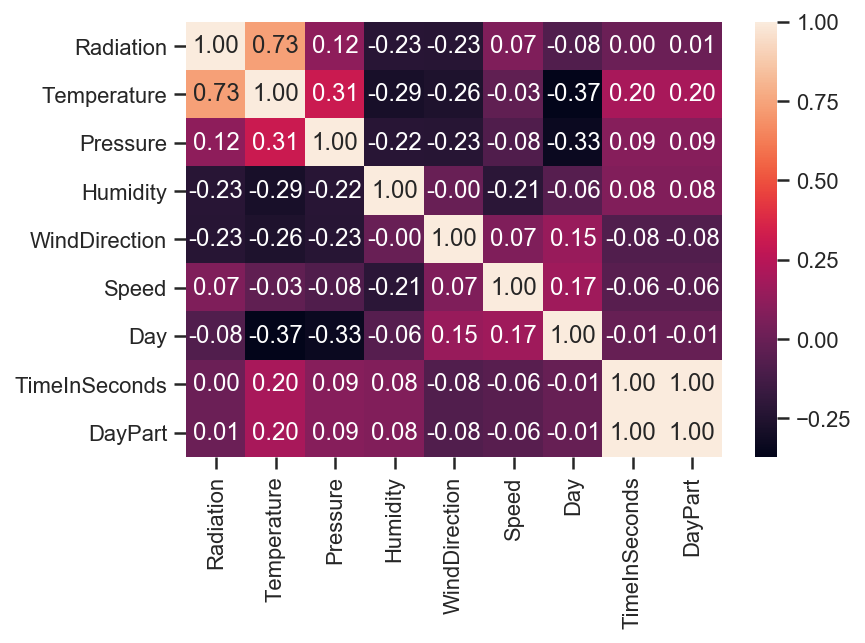

In [20]:
sns.heatmap(df.corr(), annot=True, fmt=".2f");

Видно, что мощность солнечного излучения заметно коррелирует с&nbsp;температурой, что было показано выше с&nbsp;помощью парного графика. Также заметно коррелируют время дня и проекция этого времени на&nbsp;промежуток светового дня. При этом последняя характеристика слегка больше коррелирует с&nbsp;целевым признаком, так что, возможно, следует использовать именно эту характеристику.